# Forward Kinematics
To produce the 3D linear piecewise function joining the sensors together, I will experiment with ways of calculating the forward kinematics.

It will progress likely as this:
- My initial intuition of how this should work
- Improvements to that (and how other people approach this)
- How matrices can make this process more efficient
- How to interpolate these piecewise functions into a cubic spline

#### Specific Improvements
- Describe what other improvements are needed before moving onto cubic interpolation (and preparing with serial reading)
    - Ask AI (Claude & Gemini) for this to see other considerations are needed
    - To do this, write in pseudocode the necessity to doing this at all (in context of project), and then ask for what needs to be developed for this.

    As a note, in the final version of this, I will be using serial data (handled through delay and being able to already extract serial data) but that's the only change from the initial.


***N.B.***
- If I want to make this code more efficient, doing more modelling will help with that intention. Therefore, the n-body simulation needs to be worked on simultaneously since I cannot think on how to increase the efficiency of these subsequent calculations **or** to even include forward kinematics into this. So following instructions into this (such as a forward kinematics solver code or systems engineering simulation) will help immesurably.

[(-0.3067429890961575, -0.7575940068476344, -0.5761597516565186), (-0.446865488545562, -1.0137859051607025, -0.41751805841498274), (-0.39253006710134797, -0.7868257298403705, -0.3507187905379023), (-0.5798131009854706, -0.6563919723258826, -0.4082686167292381), (-0.6272124896832977, -0.5993904519201496, -0.3115582190767793), (-0.6647254663179352, -0.8530780860995635, -0.5684786604508689), (-0.48189543839868376, -0.8399335931989393, -0.7310458324044146), (-0.32191326270198567, -0.8297648137779638, -0.788329095731532), (-0.39702883548308, -1.1235810943271523, -0.8510533013763778), (-0.5780696613930097, -1.1421892816109205, -1.1282901580310598), (-0.6398685436859887, -0.969633771537343, -0.945924377121489), (-0.4830836979492023, -1.1195995294606247, -1.0012444881066356), (-0.23195165098855663, -1.0608913022008524, -1.1340332688442243), (-0.2775994918516141, -1.0436029726180167, -0.9069779419549631), (-0.4849040272834094, -0.956893207800821, -1.1741173734997408), (-0.7639080252337787, -1.2

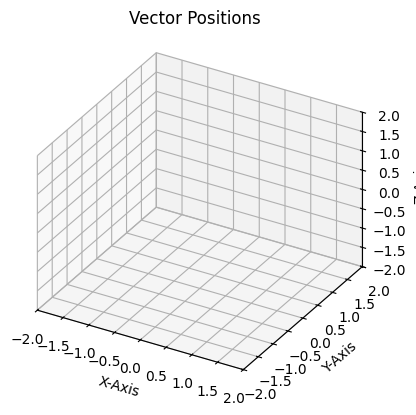

'\nax.quiver(0, 0, 0, normalised_vector_list[0][0], normalised_vector_list[0][1], normalised_vector_list[0][2], color = "b", arrow_length_ratio = 0.05)\nax.quiver(base_1[0], base_1[1], base_1[2], normalised_vector_list[1][0], normalised_vector_list[1][1], normalised_vector_list[1][2], color = "r", arrow_length_ratio = 0.05)\nax.quiver(base_2[0], base_2[1], base_2[2], normalised_vector_list[2][0], normalised_vector_list[2][1], normalised_vector_list[2][2], color = "g", arrow_length_ratio = 0.05)\n# ax.quiver(0, 0, 0, normalised_vector_list[3][0], normalised_vector_list[3][1], normalised_vector_list[3][2], color = "k", arrow_length_ratio = 0.05)\n\nax.set_xlim([-3, 3])\nax.set_ylim([-3, 3])\nax.set_zlim([-3, 3])\n\nax.set_xlabel("X-Axis")\nax.set_ylabel("Y-Axis")\nax.set_zlabel("Z-Axis")\nax.set_title(\'Vector Positions\')\n\n\nax.set_proj_type(\'ortho\')\nplt.show()\n'

In [1]:
# import modules
import random
import time # to have a delay in the plotting of the jittery points
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

# show 6 3D vectors
## how would this be changed with the parsing of the different channels from the serial?
vector_list = [(random.uniform(-3, 3), random.uniform(-3, 3), random.uniform(-3, 3)) for i in range(6)]

# attribute a distance to them all
distance_n = [0.2, 0.13, 0.3, 0.22, 0.18] # only 5 distances between the points

# show scaled vectors (to the distances of "n")
magnitude_vector_list = [math.sqrt((vector_list[i][0] ** 2) + (vector_list[i][1] ** 2) + (vector_list[i][2] ** 2)) for i in range(len(vector_list))]
normalised_vector_list = [((vector_list[i][0] / magnitude_vector_list[i]), (vector_list[i][1] / magnitude_vector_list[i]), (vector_list[i][2] / magnitude_vector_list[i])) for i in range(len(vector_list))]

"""
# calculate the base coordinates for each of the vectors
base_0 = [0,0,0] # the origin (an arbitrary invariant (fixed) point)
base_1 = [(normalised_vector_list[0][0]), (normalised_vector_list[0][1]), (normalised_vector_list[0][2])]
base_2 = [(normalised_vector_list[0][0] + normalised_vector_list[1][0]), (normalised_vector_list[0][1] + normalised_vector_list[1][1]), (normalised_vector_list[0][2] + normalised_vector_list[1][2])]"""

# plot static graph with vectors
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

n = 70

# each length of the kinematic chain

## length 1
vect_ani_1 = [] # indicating the first kinematic chain
vect_ani_1.append(normalised_vector_list[0])

for i in range(n):
    j,k,l = vect_ani_1[i]
    j += random.uniform(-0.3, 0.3)
    k += random.uniform(-0.3, 0.3)
    l += random.uniform(-0.3, 0.3)

    vect_ani_1.append((j, k, l))
print(vect_ani_1)

## length 2
vect_ani_2 = [] # indicating the second kinematic chain
vect_ani_2.append(normalised_vector_list[1])

for i in range(n):
    j,k,l = vect_ani_2[i]
    j += random.uniform(-0.3, 0.3)
    k += random.uniform(-0.3, 0.3)
    l += random.uniform(-0.3, 0.3)

    vect_ani_2.append((j, k, l))
print(vect_ani_2)

## length 3
vect_ani_3 = [] # indicating the third kinematic chain
vect_ani_3.append(normalised_vector_list[2])

for i in range(n):
    j,k,l = vect_ani_3[i]
    j += random.uniform(-0.3, 0.3)
    k += random.uniform(-0.3, 0.3)
    l += random.uniform(-0.3, 0.3)

    vect_ani_3.append((j, k, l))
print(vect_ani_3)

# setup
lim = 2

ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title('Vector Positions')

# animation function
def animate(i):
    print(f"{i}")

    ax.clear()

    # calculating the final base
    base_2 = [(vect_ani_1[i][0] + vect_ani_2[i][0]), (vect_ani_1[i][1] + vect_ani_2[i][1]), (vect_ani_1[i][2] + vect_ani_2[i][2])]

    # display vector points
    ax.scatter(vect_ani_1[i][0], vect_ani_1[i][1], vect_ani_1[i][2], c = "r") # end of first vector
    ax.scatter(vect_ani_1[i][0] + vect_ani_2[i][0], vect_ani_1[i][1] + vect_ani_2[i][1], vect_ani_1[i][2] + vect_ani_2[i][2], c="r")  # translated second vector
    ax.scatter(base_2[0] + vect_ani_3[i][0], base_2[1] + vect_ani_3[i][1], base_2[2] + vect_ani_3[i][2], c="r")  # translated third vector

    # display the quivers
    ax.quiver(0,0,0, vect_ani_1[i][0], vect_ani_1[i][1], vect_ani_1[i][2], color = "b", arrow_length_ratio = 0.05)
    ax.quiver(vect_ani_1[i][0], vect_ani_1[i][1], vect_ani_1[i][2], vect_ani_2[i][0], vect_ani_2[i][1], vect_ani_2[i][2], color = "m", arrow_length_ratio = 0.05)
    ax.quiver(base_2[0], base_2[1], base_2[2], vect_ani_3[i][0], vect_ani_3[i][1], vect_ani_3[i][2], color = "g", arrow_length_ratio = 0.05)

    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])

    ax.set_xlabel("X-Axis")
    ax.set_ylabel("Y-Axis")
    ax.set_zlabel("Z-Axis")
    ax.set_title('Vector Positions')

# finishing touches
ani = FuncAnimation(fig, animate, frames=len(vect_ani_1),cache_frame_data=False, interval = 500) # increased interval time
ax.set_proj_type('ortho')

plt.show()


# Outputs
Below is the output of the animation code that I have.
I now have the intention of developing this so that every vector point will be joined using a smooth continuous curve.

*N.B. Unable to commit the video that corresponds to this.*
<!--
<video controls src="Recording 2025-06-29 143509.mp4" title="Title"></video>
<video controls src="Recording 2025-06-29 143509.mp4" title="Title"></video>
-->